In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.regression import *

In [2]:
%cd ..
%cd data\processed
df = pd.read_csv('2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\processed


In [3]:
df = df[df.days_to_donation >= 0]

In [5]:
df = df[df.days_to_donation < df.days_to_donation.quantile(.97)]
df.shape

(10465, 41)

In [6]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after', 'first_cont_order'], axis=1)
df.head()

,owner_no,order_dt,tot_ticket_paid_amt,tot_contribution_paid_amt,first_order_dt,first_cont_dt,geo_area_desc,Prelim Capacity,ltv_tkt_value,Lifetime Giving,prospect_board,days_to_donation,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
50,7132,2015-08-04,0.297910,0.0,2015-01-31,2020-03-25,1,4,0.37865,7.517521,0,1880,0.100180,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
51,7132,2015-08-05,0.000000,0.0,2015-01-31,2020-03-25,1,4,0.37865,7.517521,0,1880,0.113355,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
52,7132,2015-09-02,-0.720197,0.0,2015-01-31,2020-03-25,1,4,0.37865,7.517521,0,1880,0.113355,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
53,7132,2016-02-16,0.416722,0.0,2015-01-31,2020-03-25,1,4,0.37865,7.517521,0,1880,0.379081,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
54,7132,2017-03-10,0.443393,0.0,2015-01-31,2020-03-25,1,4,0.37865,7.517521,0,1880,0.495472,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1


In [7]:
setup(
    df, 
    target = 'days_to_donation',
    train_size = 0.8,
    verbose = True,
    numeric_features = [
        'geo_area_desc',
        'Prelim Capacity'
    ]
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5143
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10465, 39)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  tot_ticket_paid_amt  tot_contribution_paid_amt  \
 50        7132.0             0.297910                   0.000000   
 51        7132.0             0.000000                   0.000000   
 52        7132.0            -0.720197                   0.000000   
 53        7132.0             0.416722                   0.000000   
 54        7132.0             0.443393                   0.000000   
 ...          ...                  ...                        ...   
 70364  2418931.0             0.337772                   0.000000   
 70365  2418999.0            -0.720197                   5.298317   
 70366  2418999.0             0.248010                   0.000000   
 70367  2419011.0            -0.720197                   5.521461   
 70369  2419248.0             0.420163                   0.000000   
 
        geo_area_desc  Prelim Capacity  ltv_tkt_value  Lifetime Giving  \
 50               1.0              4.0       0.378650         7.517521   
 51               1.0 

In [8]:
compare_models(verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,106.0164,54059.0471,231.7514,0.9055,1.5495,1.8739,14.6032
1,Random Forest,124.9810,60068.2163,244.3176,0.8949,1.6953,1.9758,9.4750
2,Extreme Gradient Boosting,162.3718,65623.4697,255.9717,0.8850,1.7729,2.3744,4.7381
3,CatBoost Regressor,186.3941,79470.0162,281.6697,0.8608,1.7979,2.7717,18.4596
4,Decision Tree,99.4358,109582.4818,329.0082,0.8080,1.4309,1.5119,0.3829
5,Light Gradient Boosting Machine,244.7470,122148.3204,349.1323,0.7861,1.9538,3.4968,0.8102
6,K Neighbors Regressor,190.7218,148782.2579,385.4529,0.7395,1.8422,2.0799,0.6142
7,Gradient Boosting Regressor,414.8289,278794.1926,527.8732,0.5117,2.1812,6.1139,6.2415
8,AdaBoost Regressor,569.5622,445656.5378,667.4956,0.2194,2.5961,10.3547,2.8312
9,Lasso Regression,543.6927,450378.6452,670.9883,0.2111,2.4781,9.1132,0.2822


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5143, verbose=0, warm_start=False)

In [9]:
model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,106.7363,118497.1563,344.2342,0.7974,1.4653,0.4424
1,109.6169,115236.4236,339.4649,0.7905,1.5316,1.6948
2,105.5651,132252.8387,363.6658,0.7695,1.4419,2.4862
3,105.8124,115386.4934,339.6859,0.8017,1.6582,1.4446
4,65.2688,60394.9749,245.7539,0.8956,1.1404,0.2867
5,92.4588,102349.8901,319.9217,0.8189,1.4192,0.9170
6,82.4982,80565.8769,283.8413,0.8550,1.3175,0.3454
7,103.1613,105341.7395,324.5639,0.8173,1.3839,5.8586
8,117.8769,138427.1123,372.0579,0.7562,1.5956,1.0726
9,105.3632,127372.3118,356.8926,0.7782,1.3560,0.5709


In [10]:
%cd ..\..
%cd ML_Contributions\reports\figures

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
[WinError 3] The system cannot find the path specified: 'ML_Contributions\\reports\\figures'
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions


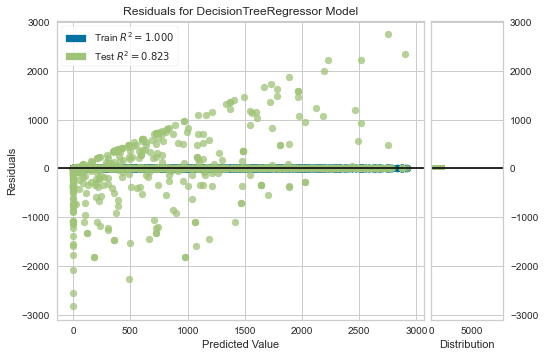

In [11]:
plot_model(model, plot='residuals', save=True, verbose=True)

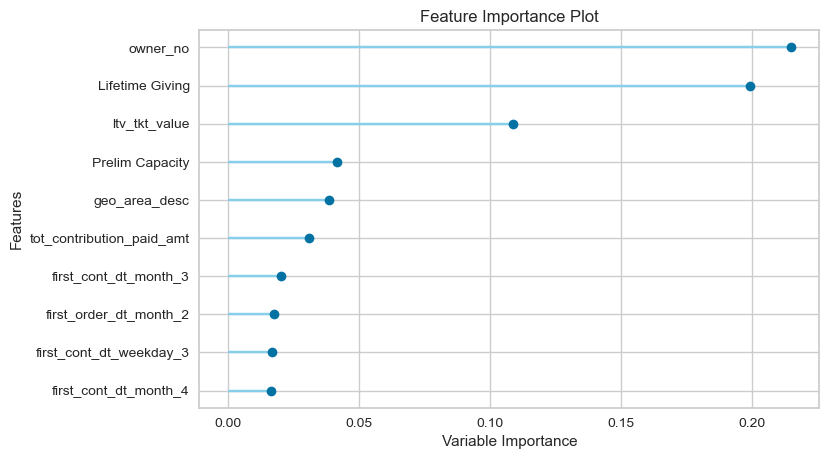

In [12]:
plot_model(model, plot='feature', save=True, verbose=True)

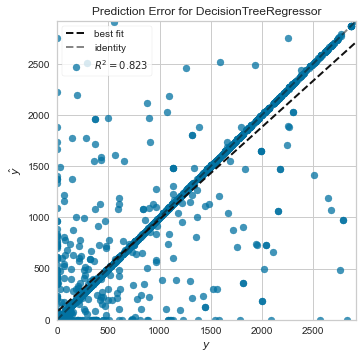

In [13]:
plot_model(model, plot='error', save=True, verbose=True)

In [14]:
predict_model(model, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,95.0291,102761.182,320.5639,0.8228,1.5093,0.4315


,owner_no,tot_ticket_paid_amt,tot_contribution_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,Lifetime Giving,rolling_tkt_sum,prospect_board_0,prospect_board_1,...,first_cont_dt_weekday_3,first_cont_dt_weekday_4,first_cont_dt_weekday_5,first_cont_dt_weekday_6,first_cont_dt_is_month_end_0,first_cont_dt_is_month_end_1,first_cont_dt_is_month_start_0,first_cont_dt_is_month_start_1,days_to_donation,Label
0,250908.0,0.256508,0.0,1.0,4.0,0.287816,6.684612,0.242054,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1643.0,1643.0
1,399812.0,-0.720197,0.0,1.0,4.0,0.313538,7.886081,0.460179,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,741.0,741.0
2,250908.0,0.110229,0.0,1.0,4.0,0.287816,6.684612,0.065087,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1643.0,1643.0
3,260991.0,0.471095,0.0,1.0,0.0,0.357756,7.600902,0.553028,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,428911.0,0.367194,0.0,1.0,4.0,0.135264,8.032685,0.163583,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,226.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,1485790.0,-0.720197,0.0,1.0,6.0,0.620952,17.347035,0.796931,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,177.0,177.0
2089,2410370.0,0.024783,0.0,1.0,0.0,0.146674,5.480639,0.234026,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,425.0,425.0
2090,2337694.0,0.264506,0.0,1.0,3.0,0.343358,6.214608,0.421933,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,816.0,816.0
2091,1766387.0,0.119002,0.0,2.0,4.0,0.292728,7.444249,0.441407,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1940.0,1940.0


In [19]:
%cd Springboard/ML_Contributions/models

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\models


In [20]:
save_model(model, 'PyCaret on Target 3', verbose=True)

Transformation Pipeline and Model Succesfully Saved


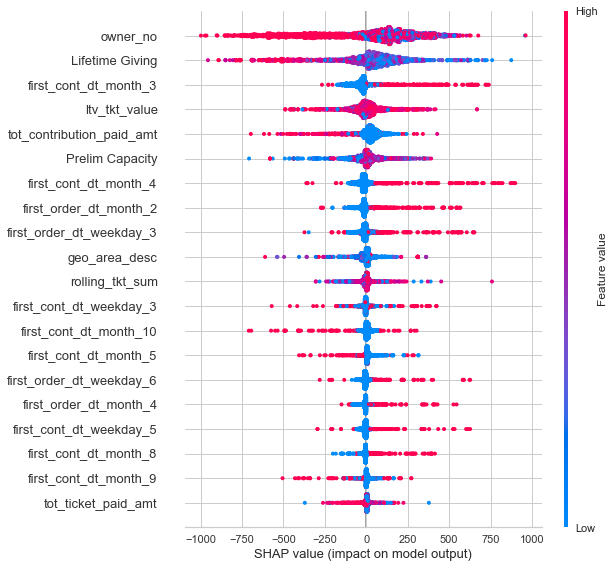

In [21]:
interpret_model(model)